In [7]:
%cd /content/drive/MyDrive/Data Mining/6. Association Rule Learning

/content/drive/MyDrive/Data Mining/6. Association Rule Learning


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
#libraries
import pandas as pd
from mlxtend.frequent_patterns import association_rules, apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
#Data

dataset = pd.read_csv('restaurants-challenge.csv')
dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BROOKLYN,Chinese,Z
0,MANHATTAN,American,C
1,BRONX,Chicken,C
2,MANHATTAN,American,A
3,MANHATTAN,American,A
4,MANHATTAN,American,C


In [10]:
#Preparing Transactions

dataset.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(179730, 3)

In [11]:
#Transaction List

transactions = []
for i in range(0, 179730):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 3)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
#Encode the transactions

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_transations = te.fit_transform(transactions)
df = pd.DataFrame(te_transations, columns=te.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,A,Afghan,African,American,Armenian,Asian,Australian,B,BRONX,BROOKLYN,...,Southwestern,Spanish,Steak,Tapas,Tex-Mex,Thai,Turkish,Vegetarian,Vietnamese/Cambodian/Malaysia,Z
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#Apriori

model = apriori(df, min_support=0.03, use_colnames=True)
results = association_rules(model, metric='confidence', min_threshold=0.3)
results.sort_values(by = 'lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,( American ),"( A, MANHATTAN )",0.239164,0.214806,0.072642,0.303734,1.413995,0.021268,1.127722,0.384819
14,"( A, MANHATTAN )",( American ),0.214806,0.239164,0.072642,0.338177,1.413995,0.021268,1.149606,0.372880
7,( MANHATTAN ),( American ),0.412647,0.239164,0.129867,0.314717,1.315904,0.031177,1.110251,0.408725
8,( American ),( MANHATTAN ),0.239164,0.412647,0.129867,0.543003,1.315904,0.031177,1.285246,0.315529
18,"( American , B)",( MANHATTAN ),0.061208,0.412647,0.033228,0.542860,1.315556,0.007970,1.284843,0.255504
12,( Chinese ),( BROOKLYN ),0.118038,0.232744,0.036076,0.305633,1.313174,0.008604,1.104972,0.270404
15,"( A, American )",( MANHATTAN ),0.134402,0.412647,0.072642,0.540487,1.309805,0.017182,1.278208,0.273253
9,( Chinese ),( B),0.118038,0.283887,0.041768,0.353853,1.246459,0.008259,1.108283,0.224190
0,( American ),( A),0.239164,0.513081,0.134402,0.561963,1.095273,0.011691,1.111595,0.114329
16,"( MANHATTAN , American )",( A),0.129867,0.513081,0.072642,0.559359,1.090197,0.006010,1.105025,0.095083


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


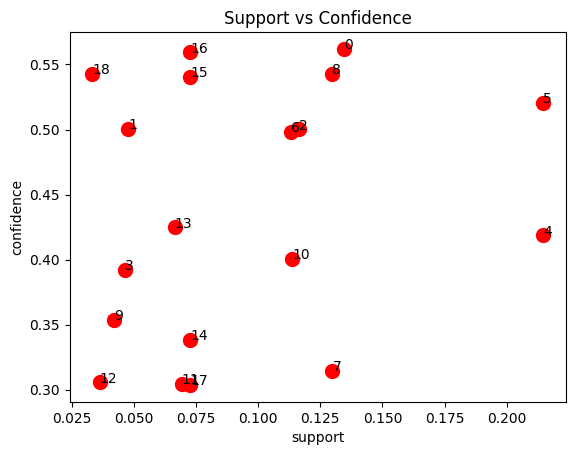

In [14]:
#Visualization

import matplotlib.pyplot as plt
plt.scatter(results['support'],
            results['confidence'],
            s = 100,
            color = 'red')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
for i, label in enumerate(results.index):
  plt.annotate(label,(results['support'][i], results['confidence'][i]))
plt.show()